<a href="https://colab.research.google.com/github/Sapienza-AI-Lab/esercitazione6-22-23/blob/main/Exercise3.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

# Esercizio 3
Task 1: Ripetete l'esercizio 2, questa volta applicato al dataset MNIST.

Task 2: Visualizzate i coefficienti del modello ottenuto per ogni classe.

In [1]:
from pathlib import Path
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Caricamento del dataset

In [2]:
class MNISTDataset:
    def __init__(self, train_size=60000, test_size=10000):
        # load data
        mnist = fetch_openml('mnist_784', version=1, cache=True, data_home=Path('data/openml'))
        mnist.target = mnist.target.astype(int)
        # mnist test data is in the last 10k samples
        self.train_x = mnist.data[:train_size]
        self.train_y = mnist.target[:train_size]
        self.test_x = mnist.data[-test_size:]
        self.test_y = mnist.target[-test_size:]
        # normalize data
        self.train_x = self.train_x / 255.0
        self.test_x = self.test_x / 255.0

    def get_train_data(self):
        return self.train_x, self.train_y

    def get_test_data(self):
        return self.test_x, self.test_y


# Load MNIST data
mnist = MNISTDataset()
test_x, test_y = mnist.get_test_data()
train_x, train_y = mnist.get_train_data()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### Task 1

In [4]:
# Train logistic regression model
# Tip: use multi_class='multinomial'
model = LogisticRegression(multi_class='multinomial')
model.fit(train_x, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [8]:
# Predict on test set
pred_y = model.predict(test_x)

In [9]:
# Evaluate accuracy
accuracy = accuracy_score(test_y, pred_y)
print("acc: " + str(accuracy))

acc: 0.9258


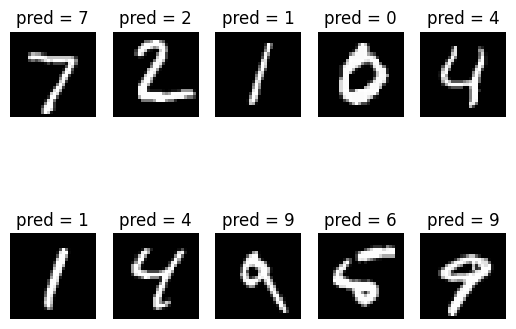

In [10]:
# Plot some predictions
fig, axes = plt.subplots(2, 5)
for i in range(2):
    for j in range(5):
        axes[i, j].imshow(test_x.iloc[i * 5 + j, :].values.reshape(28, 28), cmap='gray')
        axes[i, j].set_title('pred = ' + str(pred_y[i * 5 + j]))
        axes[i, j].axis('off')
plt.show()

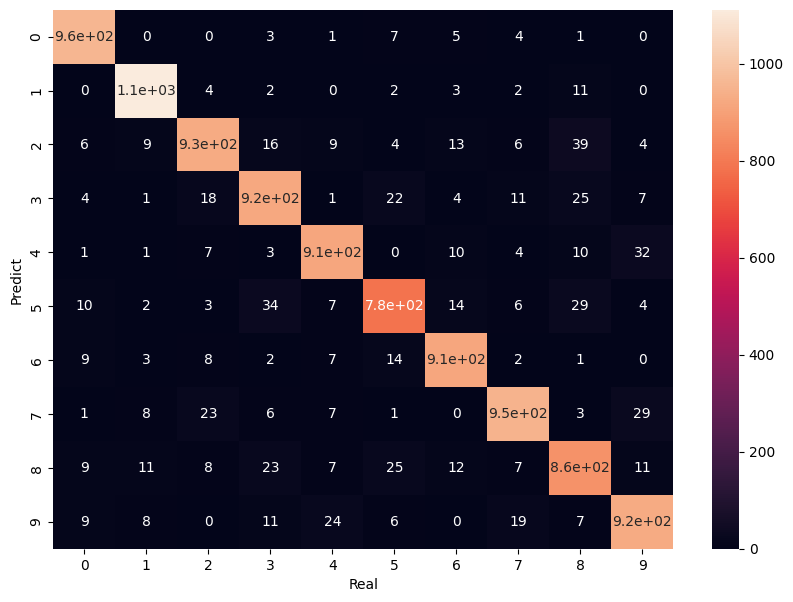

In [13]:
# Plot confusion matrix
cm = confusion_matrix(test_y, pred_y)
df_cm = pd.DataFrame(cm, index=range(10), columns=range(10))
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True)
plt.xlabel("Real")
plt.ylabel("Predict")
plt.show()

La matrice di confusione è una tabella che mostra le prestazioni di un modello di classificazione su un insieme di dati di test, confrontando le predizioni del modello con le etichette effettive dei dati di test. In particolare, è spesso utilizzata in problemi di classificazione multiclasse.

* La diagonale principale della matrice rappresenta le predizioni corrette, mentre le celle al di fuori della diagonale rappresentano gli errori di classificazione.
* Ogni riga della matrice rappresenta la classe reale, mentre ogni colonna rappresenta la classe predetta.
* La matrice di confusione fornisce informazioni dettagliate sulle prestazioni del modello, aiutando a identificare le classi che potrebbero essere scambiate erroneamente tra loro.

una matrice di confusione è uno strumento utile per valutare in modo più approfondito le prestazioni di un modello di classificazione rispetto a misure aggregate come l'accuratezza.






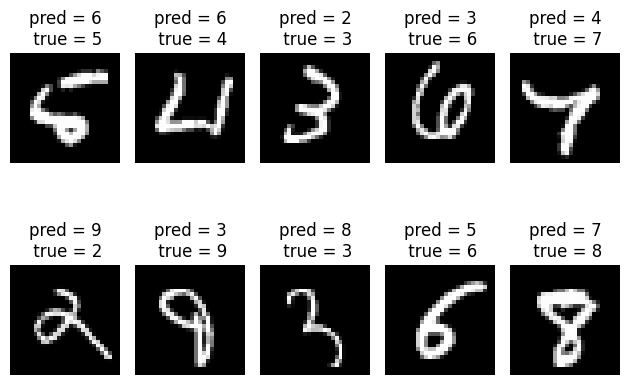

In [12]:
# Plot some misclassified samples and their true labels
misclassified = np.where(pred_y != test_y)[0]
fig, axes = plt.subplots(2, 5)
for i in range(2):
    for j in range(5):
        axes[i, j].imshow(test_x.iloc[misclassified[i * 5 + j], :].values.reshape(28, 28), cmap='gray')
        axes[i, j].set_title('pred = ' + str(pred_y[misclassified[i * 5 + j]]) + '\n true = ' + str(test_y.iloc[misclassified[i * 5 + j]]))
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()

### Task 2

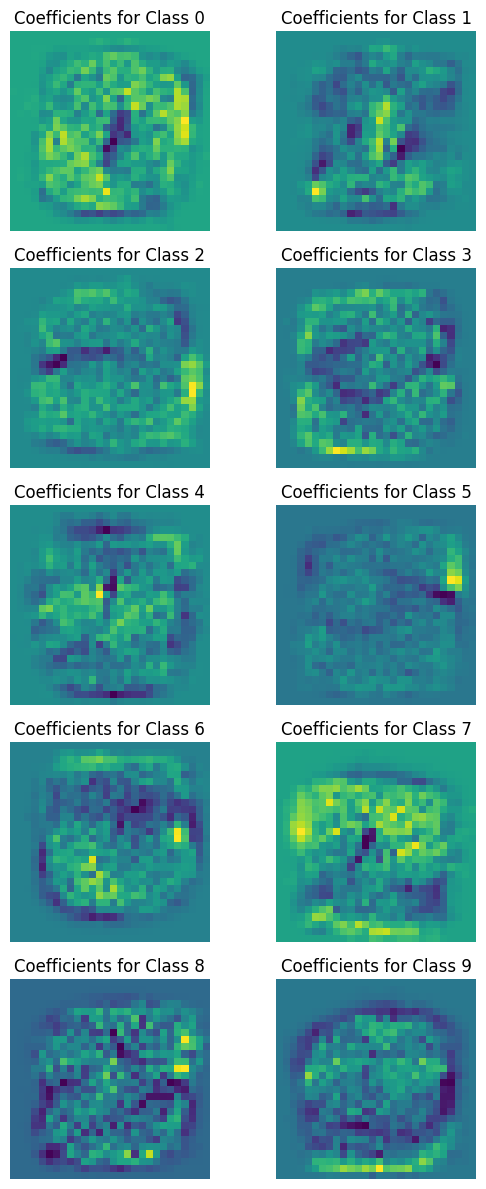

In [14]:
# Plot the logistic regression coefficients as images
import matplotlib.pyplot as plt

image_width = 28
image_height = 28
n_classes = 10

# Reshape coefficients for each class into image shape
coef_images = model.coef_.reshape(-1, image_width, image_height)

# Plot coefficient images for each class
fig, axes = plt.subplots(5, 2, figsize=(6, 12))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(coef_images[i])
    ax.set_title(f"Coefficients for Class {i}")
    ax.axis('off')
plt.tight_layout()
plt.show()

Il grafico mostra le immagini dei coefficienti associati a ciascuna cifra. Ogni subplot rappresenta i pesi assegnati a ciascun pixel nell'immagine per classificare correttamente quella specifica cifra. Le zone più scure o più chiare nelle immagini rappresentano l'importanza dei pixel nella predizione della cifra corrispondente.

Ad esempio, se consideriamo il subplot "Coefficients for Class 0", l'immagine visualizzata rappresenta i pesi associati ai pixel per la cifra 0. I pixel più scuri in quell'immagine indicano le regioni che sono particolarmente importanti per identificare la cifra 0.

In breve, questo tipo di visualizzazione fornisce una sorta di interpretazione visuale dei pesi del modello per ciascuna classe nel contesto del dataset MNIST.